# Sparkov Fraud Dataset Analysis

This notebook performs a comprehensive analysis of the Sparkov synthetic credit card fraud dataset to understand patterns and characteristics that will inform our diffusion model implementation.

Analysis Goals:
1. Data distribution and class imbalance
2. Transaction patterns and fraud characteristics
3. Temporal patterns in fraud
4. Geographical patterns
5. Feature importance and correlations
6. Distance-based patterns

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
plt.style.use('default')  
sns.set_theme()  
%matplotlib inline

# For better display of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
# Load and combine the data
print("Loading data...")
train_df = pd.read_csv('Data/Sparkov/fraudTrain.csv')
test_df = pd.read_csv('Data/Sparkov/fraudTest.csv')

# Combine datasets
data_df = pd.concat([train_df, test_df], ignore_index=True)

print(f"\nDataset sizes:")
print(f"Training set: {len(train_df):,} records")
print(f"Test set: {len(test_df):,} records")
print(f"Combined dataset: {len(data_df):,} records")

Loading data...

Dataset sizes:
Training set: 1,296,675 records
Test set: 555,719 records
Combined dataset: 1,852,394 records


In [5]:
# Display basic information about the dataset
print("\nBasic Dataset Information:")
print("-" * 50)
print("\nFeature Overview:")
print(data_df.info())

print("\nFeature Statistics:")
print(data_df.describe())

print("\nMissing Values:")
print(data_df.isnull().sum())


Basic Dataset Information:
--------------------------------------------------

Feature Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64


Fraud Distribution Analysis:
--------------------------------------------------

Class Distribution:
Non-Fraud transactions: 99.4790%
Fraud transactions: 0.5210%


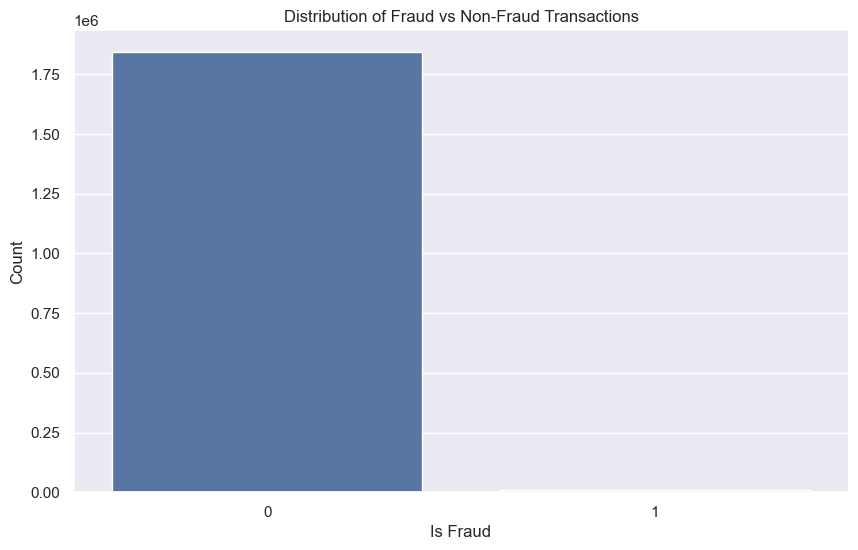


Transaction Amount Statistics by Fraud Status:
            count        mean  median           sum
is_fraud                                           
0         1842743   67.651278   47.24  1.246639e+08
1            9651  530.661412  390.00  5.121413e+06


In [6]:
# Analyze fraud distribution
print("\nFraud Distribution Analysis:")
print("-" * 50)
fraud_dist = data_df['is_fraud'].value_counts(normalize=True)
print("\nClass Distribution:")
print(f"Non-Fraud transactions: {fraud_dist[0]:.4%}")
print(f"Fraud transactions: {fraud_dist[1]:.4%}")

# Visualize fraud distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data_df, x='is_fraud')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

# Calculate fraud amounts
fraud_amounts = data_df.groupby('is_fraud')['amt'].agg(['count', 'mean', 'median', 'sum'])
print("\nTransaction Amount Statistics by Fraud Status:")
print(fraud_amounts)

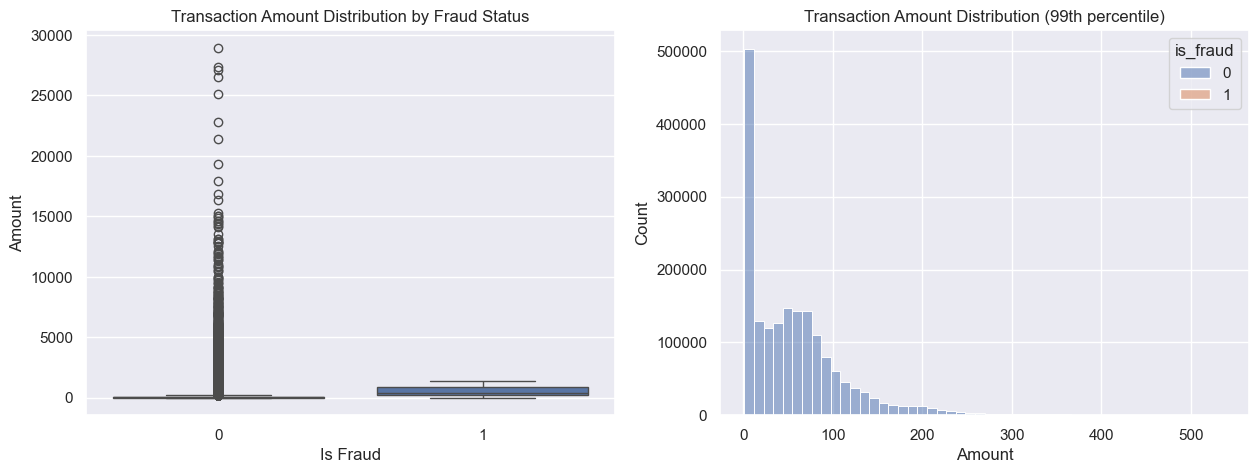


Top 5 Categories with Highest Fraud Ratio:
category
shopping_net     0.015927
misc_net         0.013039
grocery_pos      0.012645
shopping_pos     0.006344
gas_transport    0.004106
Name: count, dtype: float64


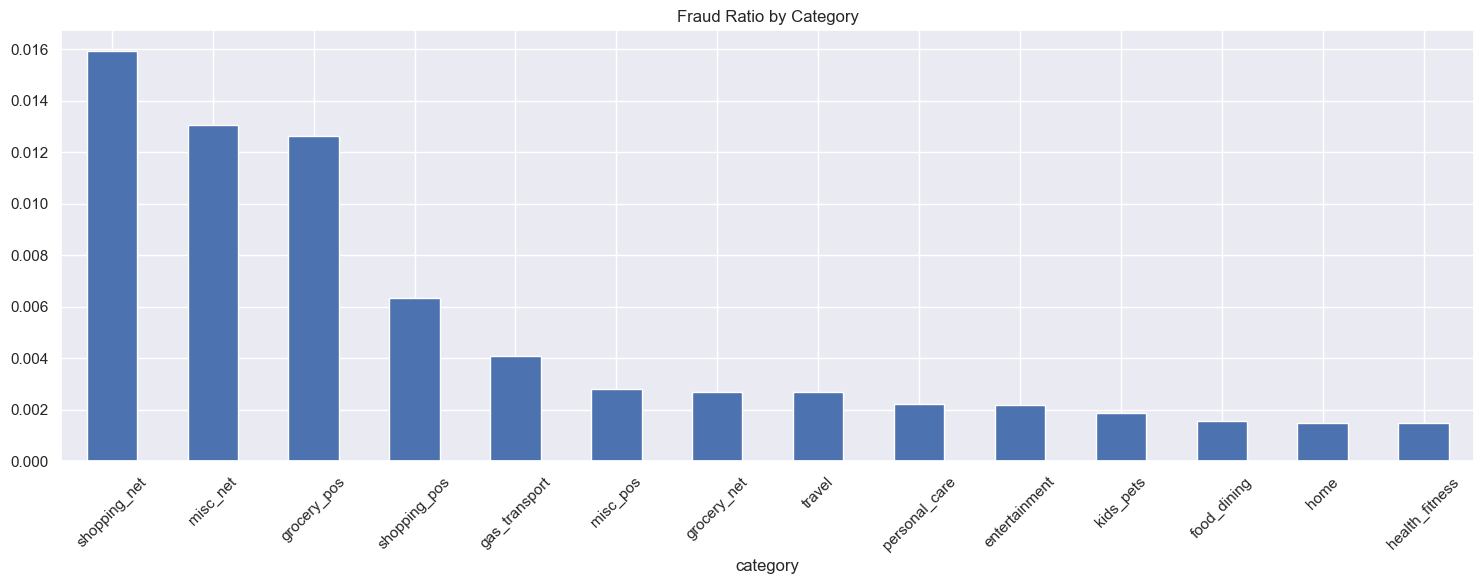

In [7]:
# Analyze transaction patterns
plt.figure(figsize=(15, 5))

# Amount distribution by fraud status
plt.subplot(1, 2, 1)
sns.boxplot(data=data_df, x='is_fraud', y='amt')
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')

# Amount histogram with fraud status
plt.subplot(1, 2, 2)
sns.histplot(data=data_df[data_df['amt'] < data_df['amt'].quantile(0.99)], 
             x='amt', hue='is_fraud', bins=50)
plt.title('Transaction Amount Distribution (99th percentile)')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

# Category analysis
category_fraud = data_df[data_df['is_fraud'] == 1]['category'].value_counts()
category_non_fraud = data_df[data_df['is_fraud'] == 0]['category'].value_counts()
fraud_ratio = (category_fraud / (category_fraud + category_non_fraud)).sort_values(ascending=False)

print("\nTop 5 Categories with Highest Fraud Ratio:")
print(fraud_ratio.head())

plt.figure(figsize=(15, 6))
fraud_ratio.plot(kind='bar')
plt.title('Fraud Ratio by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

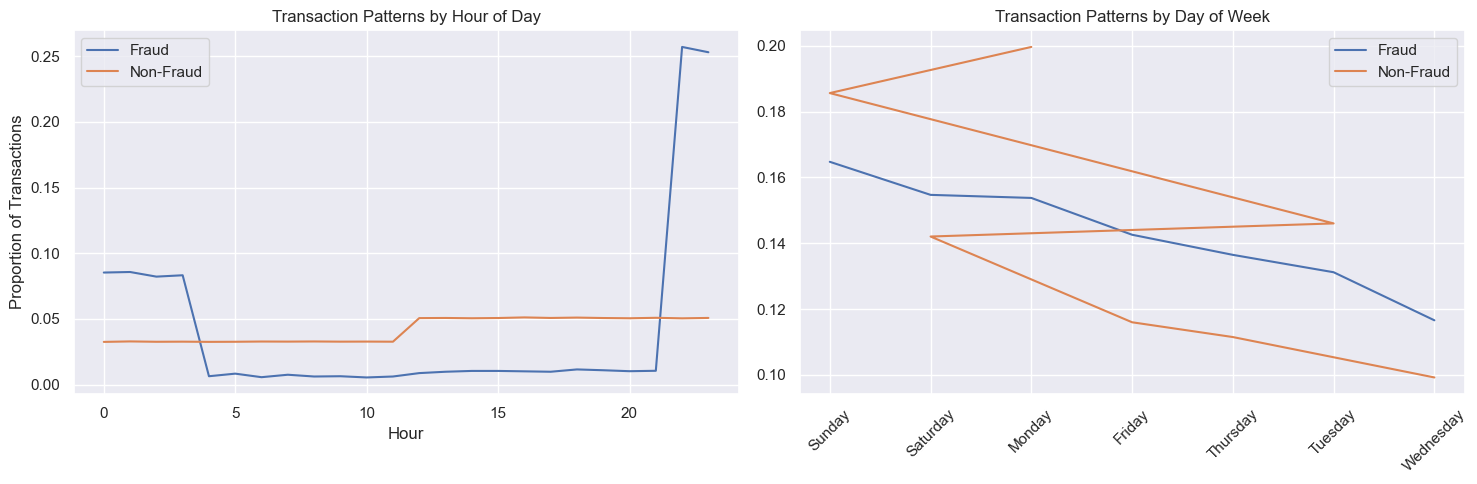

In [8]:
# Temporal analysis
data_df['trans_date_trans_time'] = pd.to_datetime(data_df['trans_date_trans_time'])
data_df['hour'] = data_df['trans_date_trans_time'].dt.hour
data_df['day_of_week'] = data_df['trans_date_trans_time'].dt.day_name()

plt.figure(figsize=(15, 5))

# Hourly patterns
plt.subplot(1, 2, 1)
fraud_by_hour = data_df[data_df['is_fraud'] == 1]['hour'].value_counts(normalize=True).sort_index()
non_fraud_by_hour = data_df[data_df['is_fraud'] == 0]['hour'].value_counts(normalize=True).sort_index()

plt.plot(fraud_by_hour.index, fraud_by_hour.values, label='Fraud')
plt.plot(non_fraud_by_hour.index, non_fraud_by_hour.values, label='Non-Fraud')
plt.title('Transaction Patterns by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Proportion of Transactions')
plt.legend()

# Daily patterns
plt.subplot(1, 2, 2)
fraud_by_day = data_df[data_df['is_fraud'] == 1]['day_of_week'].value_counts(normalize=True)
non_fraud_by_day = data_df[data_df['is_fraud'] == 0]['day_of_week'].value_counts(normalize=True)

plt.plot(fraud_by_day.index, fraud_by_day.values, label='Fraud')
plt.plot(non_fraud_by_day.index, non_fraud_by_day.values, label='Non-Fraud')
plt.title('Transaction Patterns by Day of Week')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

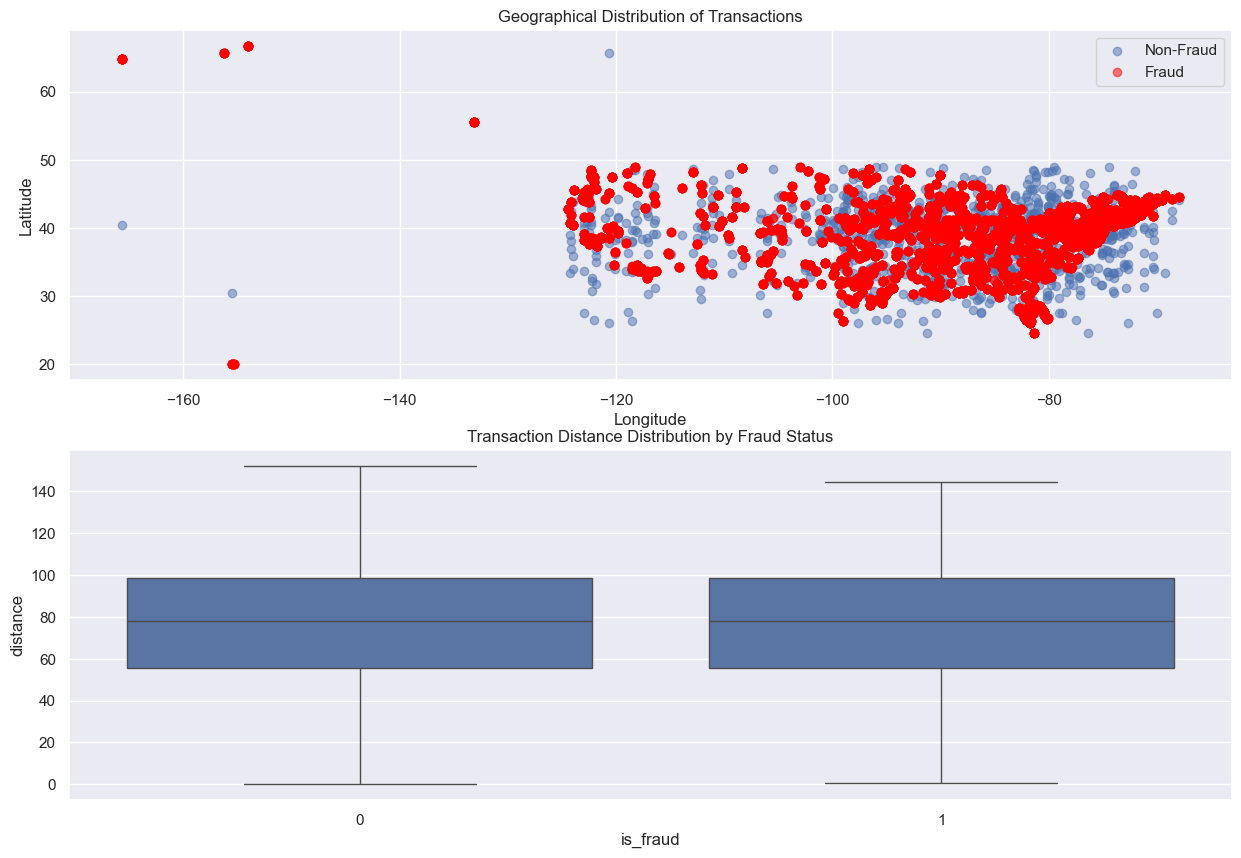


Distance Statistics by Fraud Status:
              count       mean        std       min        25%        50%  \
is_fraud                                                                    
0         1842743.0  76.110969  29.118287  0.022255  55.318729  78.216697   
1            9651.0  76.256233  28.865545  0.738769  55.573136  78.101922   

                75%         max  
is_fraud                         
0         98.510204  152.117173  
1         98.418296  144.522410  


In [9]:
# Geographical analysis
plt.figure(figsize=(15, 10))

# Transaction locations
plt.subplot(2, 1, 1)
plt.scatter(data_df[data_df['is_fraud'] == 0]['long'].sample(1000), 
           data_df[data_df['is_fraud'] == 0]['lat'].sample(1000), 
           alpha=0.5, label='Non-Fraud')
plt.scatter(data_df[data_df['is_fraud'] == 1]['long'], 
           data_df[data_df['is_fraud'] == 1]['lat'], 
           color='red', alpha=0.5, label='Fraud')
plt.title('Geographical Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Calculate and analyze distances
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

data_df['distance'] = haversine_distance(
    data_df['lat'], data_df['long'],
    data_df['merch_lat'], data_df['merch_long']
)

plt.subplot(2, 1, 2)
sns.boxplot(data=data_df, x='is_fraud', y='distance')
plt.title('Transaction Distance Distribution by Fraud Status')
plt.show()

print("\nDistance Statistics by Fraud Status:")
print(data_df.groupby('is_fraud')['distance'].describe())

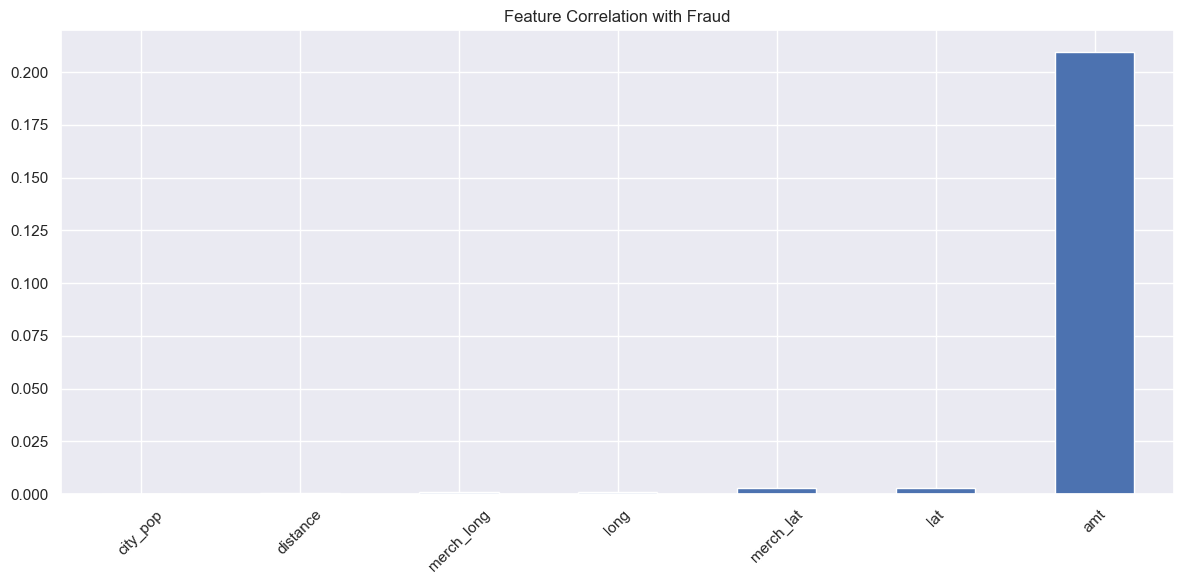


Feature Correlation with Fraud:
amt           0.209308
lat           0.002904
merch_lat     0.002778
long          0.001022
merch_long    0.000999
distance      0.000359
city_pop      0.000325
dtype: float64


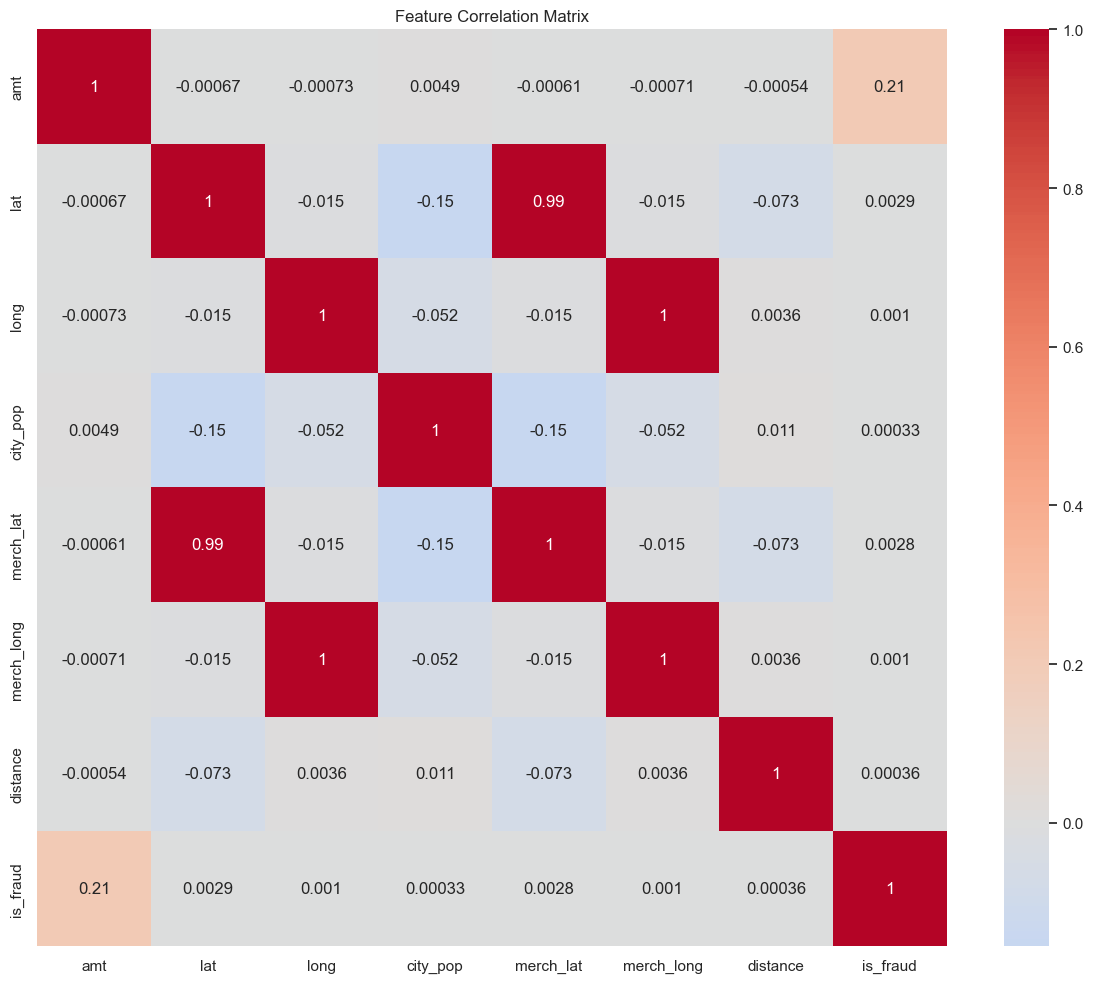

In [10]:
# Feature importance analysis
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'distance']
correlation_with_fraud = data_df[numerical_features].apply(lambda x: x.corr(data_df['is_fraud']))

plt.figure(figsize=(12, 6))
correlation_with_fraud.sort_values().plot(kind='bar')
plt.title('Feature Correlation with Fraud')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nFeature Correlation with Fraud:")
print(correlation_with_fraud.sort_values(ascending=False))

# Create correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data_df[numerical_features + ['is_fraud']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

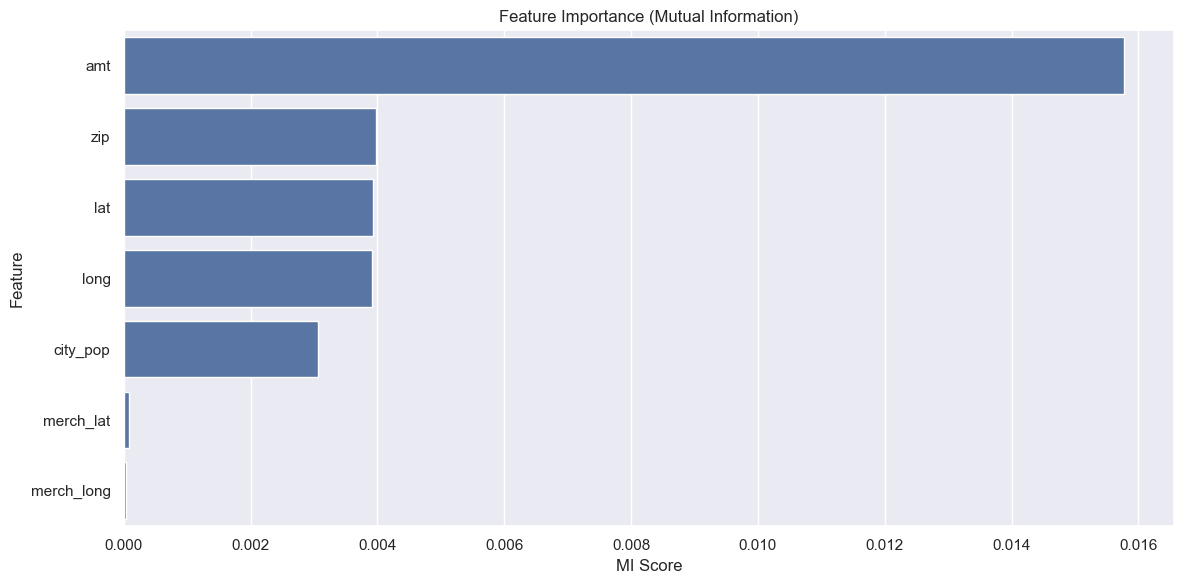


Feature Importance Ranking:
   Feature  MI Score
       amt  0.015773
       zip  0.003984
       lat  0.003931
      long  0.003914
  city_pop  0.003068
 merch_lat  0.000088
merch_long  0.000038

Feature Importance Percentages:
   Feature  Importance %
       amt     51.215873
       zip     12.936656
       lat     12.764742
      long     12.710527
  city_pop      9.962745
 merch_lat      0.287041
merch_long      0.122416


In [11]:
# Calculate mutual information scores
from sklearn.feature_selection import mutual_info_classif

# Prepare numerical features
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'zip']
X_num = data_df[numerical_features]
y = data_df['is_fraud']

# Calculate MI scores
mi_scores = mutual_info_classif(X_num, y)
mi_df = pd.DataFrame({'Feature': numerical_features, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=mi_df, x='MI Score', y='Feature')
plt.title('Feature Importance (Mutual Information)')
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print(mi_df.to_string(index=False))

# Calculate percentage contribution
mi_df['Importance %'] = (mi_df['MI Score'] / mi_df['MI Score'].sum()) * 100
print("\nFeature Importance Percentages:")
print(mi_df[['Feature', 'Importance %']].to_string(index=False))